# PyTorch 

In [1]:
import torch
import torch.nn as nn

from torchvision.datasets import MNIST
from torchvision import transforms

from torchsummary import summary

import matplotlib.pyplot as plt

### Loading Data

In [2]:
train = MNIST('data',train=True, transform=transforms.ToTensor(),download=True)
test =  MNIST('data',train=False, transform=transforms.ToTensor()) 
# ToTensor() normalizes pixels from [0, 255] to [0, 1] (but it does not take place in this step)

### Having a look at dimensionality of tensors

In [3]:
train.data.shape

torch.Size([60000, 28, 28])

In [4]:
train.data[0] # not properly scaled

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

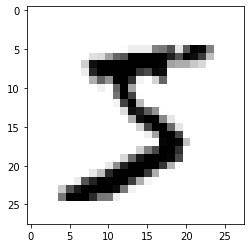

In [5]:
plt.imshow(train.data[0].numpy().squeeze(),cmap='gray_r')

In [6]:
train.targets[0]

tensor(5)

In [7]:
train.targets.shape

torch.Size([60000])

In [8]:
test.data.shape

torch.Size([10000, 28, 28])

In [9]:
test.targets.shape

torch.Size([10000])

### Batch Data (Where ToTensor() is applied)

In [10]:
train_loader = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=128)
# DataLoader() can also sample and run multithreaded over a set number of workers

In [11]:
x_sample , y_sample = iter(train_loader).next()

In [12]:
x_sample.shape

torch.Size([128, 1, 28, 28])

In [13]:
y_sample.shape

torch.Size([128])

In [14]:
y_sample

tensor([3, 2, 1, 8, 5, 3, 3, 3, 9, 7, 4, 4, 5, 4, 1, 9, 7, 8, 7, 1, 5, 2, 9, 0,
        8, 5, 1, 7, 6, 0, 3, 0, 5, 3, 1, 1, 6, 6, 7, 1, 6, 1, 3, 6, 7, 0, 0, 3,
        4, 7, 6, 3, 9, 7, 3, 2, 3, 8, 7, 1, 7, 8, 7, 6, 3, 0, 9, 9, 0, 0, 9, 1,
        0, 2, 8, 1, 5, 5, 8, 2, 4, 7, 1, 9, 0, 4, 7, 7, 5, 0, 6, 1, 3, 6, 8, 3,
        5, 0, 1, 1, 6, 1, 6, 8, 3, 8, 1, 4, 4, 2, 9, 0, 5, 6, 7, 6, 6, 4, 5, 6,
        4, 4, 5, 8, 6, 4, 4, 0])

In [15]:
x_sample[0] # Values scaled

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

### Flattenning

In [16]:
x_flat_sample = x_sample.view(x_sample.shape[0], -1) # view(128, -1) # figure out how to split them == reshape

In [17]:
x_flat_sample.shape

torch.Size([128, 784])

### Design a NN architecture

In [18]:
n_input, n_dense, n_out = 784, 64, 10

In [19]:
model = nn.Sequential(
    nn.Linear(n_input, n_dense), # (inputs, outputs), Hidden layer
    nn.Sigmoid(), # Activation Function
    nn.Linear(n_dense, n_out) # Previous layer -> output
)


In [20]:
model

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=64, out_features=10, bias=True)
)

### Configure hyperparameters

In [21]:
cost_function = nn.CrossEntropyLoss() # Includes Softmax activation

In [22]:
optimizer = torch.optim.SGD(model.parameters() , lr = 0.01)

### Training the model

In [23]:
def accuracy_pct(pred_y, true_y):
    _, prediction = torch.max(pred_y, 1)
    correct = (prediction == true_y).sum().item()
    return (correct/true_y.shape[0])*100

In [24]:
n_batches = len(train_loader)
n_epochs = 20
n_batches

469

In [27]:
print(f'Training for {n_epochs} Epochs.\n')
for epoch in range(n_epochs):

    avg_cost, avg_accuracy = 0.0,0.0
    for i, (x,y) in enumerate(train_loader):

        # Forward propagation
        x_flat = x.view(x.shape[0],-1)
        y_hat = model(x_flat)

        # Calculate cost:
        cost = cost_function(y_hat, y)
        avg_cost += cost / n_batches

        # Backward propagation
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        accuracy = accuracy_pct(y_hat, y)
        avg_accuracy += accuracy/ n_batches
        

        if (i+1)% 100 == 0:
            print(f'Step {i+1}')
    print(f'Epoch {epoch+1}/{n_epochs} complete. Cost: {avg_cost:.3f}, Accuracy: {avg_accuracy:.1f}')

Training for 20 Epochs.

Step 100
Step 200
Step 300
Step 400
Epoch 1/20 complete. Cost: 0.371, Accuracy: 89.9
Step 100
Step 200
Step 300
Step 400
Epoch 2/20 complete. Cost: 0.366, Accuracy: 90.0
Step 100
Step 200
Step 300
Step 400
Epoch 3/20 complete. Cost: 0.362, Accuracy: 90.1
Step 100
Step 200
Step 300
Step 400
Epoch 4/20 complete. Cost: 0.357, Accuracy: 90.2
Step 100
Step 200
Step 300
Step 400
Epoch 5/20 complete. Cost: 0.354, Accuracy: 90.3
Step 100
Step 200
Step 300
Step 400
Epoch 6/20 complete. Cost: 0.350, Accuracy: 90.4
Step 100
Step 200
Step 300
Step 400
Epoch 7/20 complete. Cost: 0.346, Accuracy: 90.4
Step 100
Step 200
Step 300
Step 400
Epoch 8/20 complete. Cost: 0.343, Accuracy: 90.5
Step 100
Step 200
Step 300
Step 400
Epoch 9/20 complete. Cost: 0.340, Accuracy: 90.5
Step 100
Step 200
Step 300
Step 400
Epoch 10/20 complete. Cost: 0.337, Accuracy: 90.6
Step 100
Step 200
Step 300
Step 400
Epoch 11/20 complete. Cost: 0.334, Accuracy: 90.7
Step 100
Step 200
Step 300
Step 400
Ep

In [28]:
n_test_batches = len(test_loader)
n_test_batches
model.eval() # disables dropout and batch norm

with torch.no_grad(): # disables autograd, reducing memory consumption
  
  avg_test_cost = 0.0
  avg_test_acc = 0.0
  
  for X, y in test_loader:
    
    # make predictions: 
    X_flat = X.view(X.shape[0], -1)
    y_hat = model(X_flat)
    
    # calculate cost: 
    cost = cost_function(y_hat, y)
    avg_test_cost += cost / n_test_batches
    
    # calculate accuracy:
    test_accuracy = accuracy_pct(y_hat, y)
    avg_test_acc += test_accuracy / n_test_batches

print(f'Test cost: {avg_test_cost:.3f}, Test accuracy: {avg_test_acc:.1f}')

# model.train() # 'undoes' model.eval()

Test cost: 0.298, Test accuracy: 91.6
